# Laboratorio 5: Redes Neuronales Recurrentes (RNN) para Series de Tiempo

## Autores:

- Nelson García 22434
- Christian Echeverría 221



## Carga y exploración de datos:



Importar las librerías:

In [24]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

2025-09-01 16:51:49.697233: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cargamos los datos

In [2]:
df = pd.read_csv('./Datos/IPN31152N.csv')
df.head()

,observation_date,IPN31152N
0,1972-01-01,60.1519
1,1972-02-01,67.2727
2,1972-03-01,74.4700
3,1972-04-01,78.3594
4,1972-05-01,85.0321


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  642 non-null    object 
 1   IPN31152N         642 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


Se convierte la fecha de Object a DateTime

In [4]:
df = pd.read_csv('./Datos/IPN31152N.csv', 
                 index_col = 'observation_date', 
                 parse_dates = True)


In [16]:
df.head(20)


,IPN31152N
observation_date,
1972-01-01,60.1519
1972-02-01,67.2727
1972-03-01,74.4700
1972-04-01,78.3594
1972-05-01,85.0321
1972-06-01,100.9147
1972-07-01,100.4435
1972-08-01,96.6660
1972-09-01,86.0726


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 642 entries, 1972-01-01 to 2025-06-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  642 non-null    float64
dtypes: float64(1)
memory usage: 10.0 KB


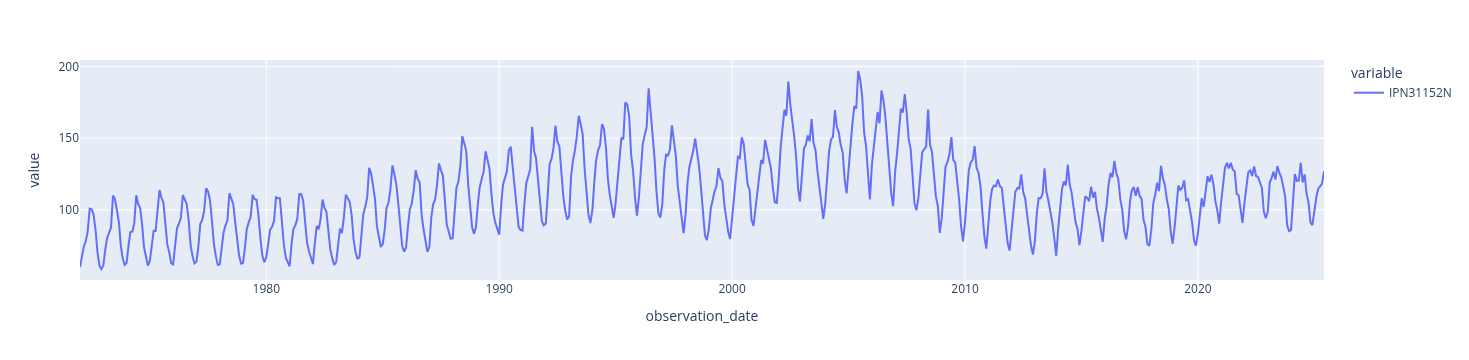

In [14]:
fig = px.line(df)
fig.show()

## División de conjuntos

In [15]:
len(df)

642

Vamos a tomar los últimos 24 meses para nuestro set de tests.

In [17]:
tamanio_prueba = 24

In [18]:
indice_prueba = len(df) - tamanio_prueba

In [19]:
entreno = df.iloc[: indice_prueba]
prueba = df.iloc[indice_prueba:]

In [21]:
entreno

,IPN31152N
observation_date,
1972-01-01,60.1519
1972-02-01,67.2727
1972-03-01,74.4700
1972-04-01,78.3594
1972-05-01,85.0321
...,...
2023-02-01,119.2751
2023-03-01,122.0175
2023-04-01,126.6790


In [23]:
prueba

,IPN31152N
observation_date,
2023-07-01,126.0569
2023-08-01,122.6748
2023-09-01,116.2177
2023-10-01,109.3279
2023-11-01,89.3353
2023-12-01,85.2839
2024-01-01,85.9573
2024-02-01,110.0548
2024-03-01,124.9787


## Normalización y preparación

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(entreno)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [27]:
datos_entreno_escalados = scaler.transform(entreno)
datos_prueba_escalados = scaler.transform(prueba)

## Generador de series de tiempo

In [29]:
longitud = 12
tamanio_tanda = 32
generador = TimeseriesGenerator(datos_entreno_escalados, 
                                datos_entreno_escalados,
                                length = longitud, 
                                batch_size = tamanio_tanda)

In [30]:
X,y = generador[0]

In [31]:
print(f'Dado el arreglo: \n{X.flatten()}')
print(f'Predecir esta y: \n {y}')

Dado el arreglo: 
[0.00946788 0.06107842 0.11324343 0.14143325 0.18979603 0.30491086
 0.30149567 0.27411688 0.19733743 0.08531309 0.01561334 0.
 0.06107842 0.11324343 0.14143325 0.18979603 0.30491086 0.30149567
 0.27411688 0.19733743 0.08531309 0.01561334 0.         0.01773913
 0.11324343 0.14143325 0.18979603 0.30491086 0.30149567 0.27411688
 0.19733743 0.08531309 0.01561334 0.         0.01773913 0.09849259
 0.14143325 0.18979603 0.30491086 0.30149567 0.27411688 0.19733743
 0.08531309 0.01561334 0.         0.01773913 0.09849259 0.15587533
 0.18979603 0.30491086 0.30149567 0.27411688 0.19733743 0.08531309
 0.01561334 0.         0.01773913 0.09849259 0.15587533 0.18355852
 0.30491086 0.30149567 0.27411688 0.19733743 0.08531309 0.01561334
 0.         0.01773913 0.09849259 0.15587533 0.18355852 0.20875425
 0.30149567 0.27411688 0.19733743 0.08531309 0.01561334 0.
 0.01773913 0.09849259 0.15587533 0.18355852 0.20875425 0.37144257
 0.27411688 0.19733743 0.08531309 0.01561334 0.         0.01

## Construcción del modelo

Tenemos 1 feature.

In [32]:
n_features = 1

In [33]:
modelo = Sequential()
modelo.add(LSTM(100, activation = 'relu', input_shape = (longitud, 
                                                         n_features)))
modelo.add(Dense(1))
modelo.compile(optimizer = 'adam', loss = 'mse')

I0000 00:00:1756767685.619109    7511 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1728 MB memory:  -> device: 0, name: NVIDIA GeForce MX150, pci bus id: 0000:02:00.0, compute capability: 6.1
/home/nelson/Documents/Uvg/Data Science/Lab5_DataScience/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [34]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

## Entranamiento:

In [35]:
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

In [36]:
generador_validacion = TimeseriesGenerator(datos_prueba_escalados,
                                           datos_prueba_escalados, 
                                           length = longitud, 
                                           batch_size = tamanio_tanda)

In [37]:
modelo.fit(generador, epochs = 20,
                    validation_data = generador_validacion,
                    callbacks = [detencion_temprana])

Epoch 1/20


/home/nelson/Documents/Uvg/Data Science/Lab5_DataScience/venv/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

2025-09-01 17:01:35.408963: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f2144004530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-01 17:01:35.408987: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX150, Compute Capability 6.1
2025-09-01 17:01:35.878615: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-01 17:01:37.186445: I external/local_xla/xla/stream_executor/cuda/cuda_dnn

 1/19 ━━━━━━━━━━━━━━━━━━━━ 2:10 7s/step - loss: 0.0859

I0000 00:00:1756767699.974287    9375 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.0759 - val_loss: 0.0073
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0259 - val_loss: 0.0073
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0219 - val_loss: 0.0073
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210 - val_loss: 0.0068
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0191 - val_loss: 0.0062
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0163 - val_loss: 0.0053
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - val_loss: 0.0028
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - val_loss: 0.0017
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0116 - val_loss: 0.0233
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0159 - val_loss: 0.0021


In [38]:
perdidas = pd.DataFrame(modelo.history.history)

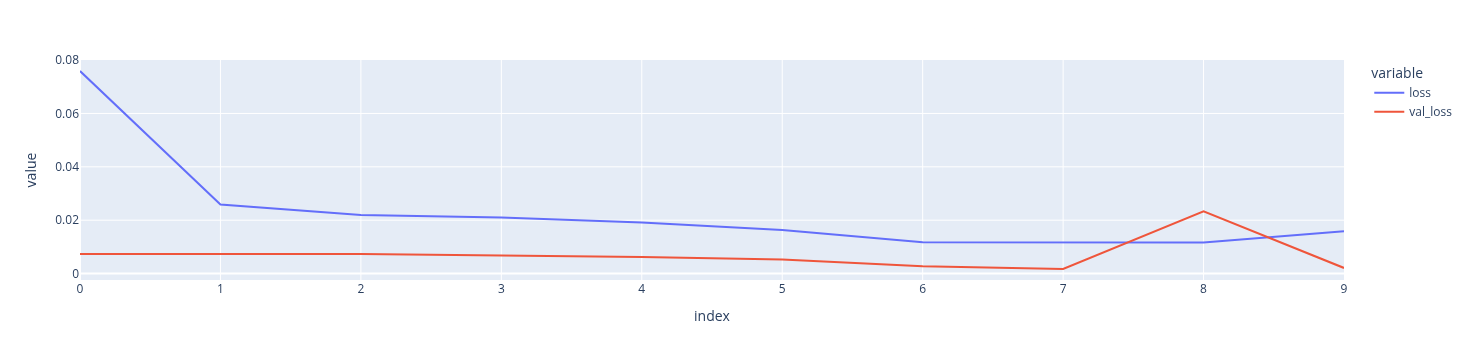

In [40]:
fig = px.line(perdidas)
fig.show()

## Evaluación

In [41]:
primera_tanda_eval = datos_entreno_escalados[-longitud:]

In [42]:
primera_tanda_eval = primera_tanda_eval.reshape((1, longitud, n_features))

In [43]:
modelo.predict(primera_tanda_eval)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


array([[0.47086453]], dtype=float32)

In [44]:
datos_prueba_escalados[0]

array([0.48713795])

In [45]:
predicciones_prueba = []

primera_tanda_eval = datos_entreno_escalados[-longitud:]
tanda_actual = primera_tanda_eval.reshape((1, longitud, n_features))

for i in range(len(prueba)):
    
    # obtener pronóstico un paso de tiempo adelantado ([0] es para 
    #   tener solo el número en vez de la totalidad de [arreglo])
    prediccion_actual = modelo.predict(tanda_actual)[0]
    
    # guardar el pronóstico o predicción
    predicciones_prueba.append(prediccion_actual) 
    
    # actualizar la tanda para incluir la predicciónal final y eliminar
    #    el primer valor
    tanda_actual = np.append(tanda_actual[:,1:,:],
                             [[prediccion_actual]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [50]:
predicciones_reales = scaler.inverse_transform(predicciones_prueba)

In [51]:
prueba['Predicciones'] = predicciones_reales

/tmp/ipykernel_7511/1226055985.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
prueba

,IPN31152N,Predicciones
observation_date,,
2023-07-01,126.0569,123.811627
2023-08-01,122.6748,121.849870
2023-09-01,116.2177,117.990073
2023-10-01,109.3279,111.715800
2023-11-01,89.3353,108.163498
2023-12-01,85.2839,110.254455
2024-01-01,85.9573,114.741905
2024-02-01,110.0548,119.608768
2024-03-01,124.9787,121.792900


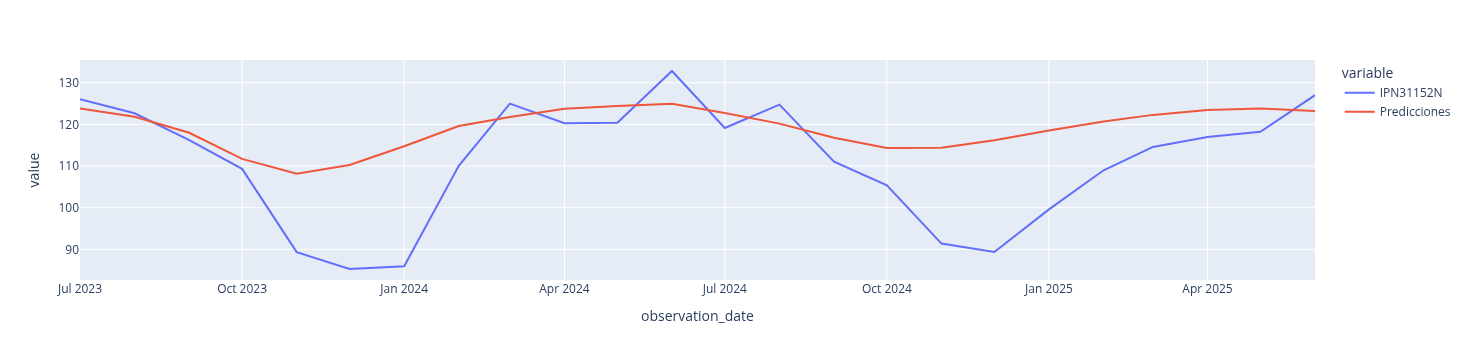

In [54]:
fig = px.line(prueba)
fig.show()